# Reconocimiento de las señales de tráfico

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
files.download("Nombre_archivo") # para descargar los archivos de colab

In [1]:
! git clone "https://github.com/INFINITY-RUBER/Curso_Machine_Learning_Data_Science_Python.git"

Cloning into 'Curso_Machine_Learning_Data_Science_Python'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 17507 (delta 77), reused 89 (delta 40), pack-reused 17366
Receiving objects: 100% (17507/17507), 521.09 MiB | 26.64 MiB/s, done.
Resolving deltas: 100% (193/193), done.
Checking out files: 100% (16903/16903), done.


In [2]:
!ls "/content/Curso_Machine_Learning_Data_Science_Python/datasets/belgian/"

Testing  Training


In [0]:
import tensorflow as tf
import os
import skimage.data as imd

import numpy as np

In [0]:
help(imd)

In [0]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
            if os.path.isdir(os.path.join(data_directory,d))]
    
    labels = []
    images = []
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        file_names = [os.path.join(label_dir, f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
        
        for f in file_names:
            images.append(imd.load(f))
            labels.append(int(d))
        
    return images, labels

In [0]:
#main_dir = "../datasets/belgian/"
main_dir = "/content/Curso_Machine_Learning_Data_Science_Python/datasets/belgian/"
train_data_dir = os.path.join(main_dir, "Training")
test_data_dir = os.path.join(main_dir, "Testing")

In [9]:
images, labels = load_ml_data(train_data_dir)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: This function is deprecated and will be removed in 0.18. Use `skimage.io.load` or `imageio.imread` directly.
  


In [10]:
len(images)

4575

In [11]:
len(labels)

4575

In [0]:
images = np.array(images)

In [0]:
labels = np.array(labels)

In [14]:
images.size

4575

In [15]:
images.ndim

1

In [0]:
images[0]

In [17]:
labels.ndim

1

In [18]:
labels.size

4575

In [19]:
len(set(labels)) # CONTABILIZA LAS DATOS UNICOS  O EL CONJUNTO DE DATOS

62

In [20]:
images.flags # INFORMACION DE COMO A GUARDA LOS DATOS EJ: WRITEABLE : True >> son sobrescribibles

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [21]:
images.itemsize

8

In [22]:
images.nbytes

36600

In [23]:
images.nbytes/images.itemsize # sacar los Megabits que estoy usando

4575.0

In [0]:
import matplotlib.pyplot as plt

(array([ 15., 110.,  13.,  15.,  15.,  11.,  18., 157.,  27.,  18.,  21.,
          7.,  18.,  90.,  43.,   9.,   9.,  79.,  81., 231.,  42.,  43.,
        375.,  15.,  48.,  42.,   6.,  18., 125.,  33.,  37.,  63., 316.,
         12.,  46.,  60.,  18.,  98., 285., 196., 242., 148.,  35.,  30.,
         48.,  74.,  44., 147.,  11.,  12.,  15.,  27.,  27., 199., 118.,
         12.,  95.,  78.,  15.,  42.,   9., 282.]),
 array([ 0.        ,  0.98387097,  1.96774194,  2.9516129 ,  3.93548387,
         4.91935484,  5.90322581,  6.88709677,  7.87096774,  8.85483871,
         9.83870968, 10.82258065, 11.80645161, 12.79032258, 13.77419355,
        14.75806452, 15.74193548, 16.72580645, 17.70967742, 18.69354839,
        19.67741935, 20.66129032, 21.64516129, 22.62903226, 23.61290323,
        24.59677419, 25.58064516, 26.56451613, 27.5483871 , 28.53225806,
        29.51612903, 30.5       , 31.48387097, 32.46774194, 33.4516129 ,
        34.43548387, 35.41935484, 36.40322581, 37.38709677, 38.3709

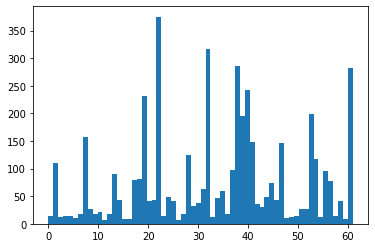

In [88]:
plt.hist(labels, len(set(labels)))
# plt.show() oculsta los datos array

In [0]:
import random

In [90]:
rand_signs = random.sample(range(0, len(labels)), 6) # una muestra aleatoria simple de 6 señales 
rand_signs

[1280, 3179, 344, 2558, 3368, 240]

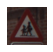

Forma:(95, 98, 3)pix, min:11, max:137


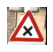

Forma:(231, 241, 3)pix, min:0, max:255


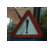

Forma:(141, 164, 3)pix, min:7, max:255


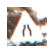

Forma:(57, 58, 3)pix, min:36, max:255


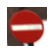

Forma:(70, 71, 3)pix, min:9, max:255


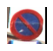

Forma:(81, 86, 3)pix, min:0, max:255


In [91]:
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}pix, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

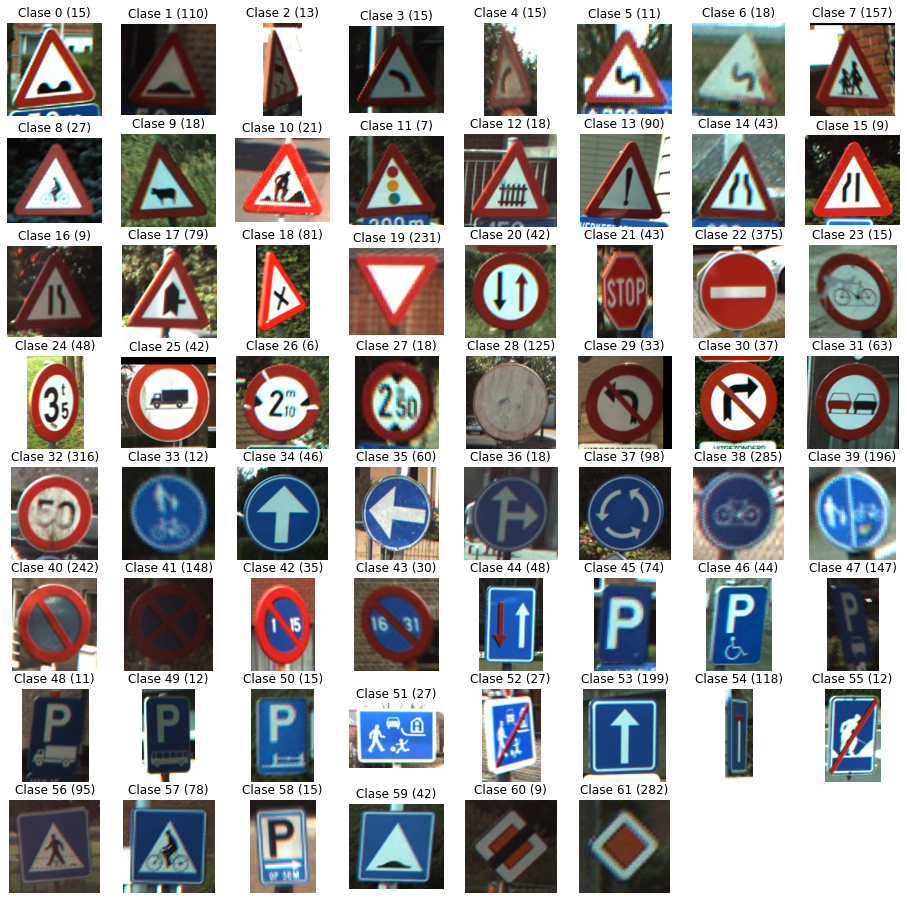

In [92]:
unique_labels = set(labels)
plt.figure(figsize=(16,16))
i = 1
for label in unique_labels:
    temp_im = images[list(labels).index(label)]
    plt.subplot(8,8, i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label, list(labels).count(label)))
    i +=1
    plt.imshow(temp_im)
plt.show()

In [93]:
type(labels)

numpy.ndarray

# Modelo de Red Neuronal con TensorFlow
* Las imágenes no todas son del mismo tamaño
* Hay 62 clases de imágenes (desde la 0 hasta la 61)
* La distribución de señales de tráfico no es uniforme (algunas salen más veces que otras)

In [0]:
from skimage import transform

In [95]:
w = 9999 
h = 9999
for image in images:
    if image.shape[0] < h:
        h = image.shape[0]
    if image.shape[1] < w:
        w = image.shape[1]
print("Tamaño mínimo: {0}x{1}".format(h,w))

Tamaño mínimo: 22x20


In [0]:
images30 = [transform.resize(image, (30,30)) for image in images]  
# rescalar el tamaño de las imagenes a tamaño 30

In [97]:
images30[0]

array([[[0.45945969, 0.40627451, 0.34926362],
        [0.504     , 0.41581699, 0.3469281 ],
        [0.49041394, 0.41346405, 0.34496732],
        ...,
        [0.3848366 , 0.34801743, 0.30697168],
        [0.37437908, 0.33704575, 0.29594771],
        [0.39856209, 0.35542484, 0.31228758]],

       [[0.49848366, 0.45952941, 0.39877124],
        [0.57003922, 0.49058824, 0.42117647],
        [0.54614379, 0.46091503, 0.39555556],
        ...,
        [0.38039216, 0.34143791, 0.29960784],
        [0.3825098 , 0.34117647, 0.29945098],
        [0.38980392, 0.33498039, 0.29960784]],

       [[0.44627451, 0.41084967, 0.34679739],
        [0.48405229, 0.43908497, 0.37267974],
        [0.48409586, 0.43071895, 0.37145969],
        ...,
        [0.39477124, 0.35119826, 0.3       ],
        [0.39699346, 0.34026144, 0.29647059],
        [0.38671024, 0.3179085 , 0.28605664]],

       ...,

       [[0.98074074, 0.98466231, 0.96788671],
        [0.96431373, 0.9475817 , 0.87712418],
        [0.71220044, 0

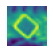

Forma:(30, 30), min:0.1389775277777779, max:0.5772900462962963


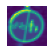

Forma:(30, 30), min:0.077042189542484, max:0.9116831666666659


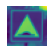

Forma:(30, 30), min:0.10603396764705886, max:0.9303622065359475


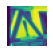

Forma:(30, 30), min:0.0, max:0.996078431372549


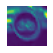

Forma:(30, 30), min:0.18686211546840953, max:0.9862350283224401


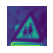

Forma:(30, 30), min:0.16116117647058834, max:0.9198286078431374


In [104]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs # se elige 6 images aleatorias 
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

In [0]:
from skimage.color import rgb2gray # libreria para cambiar imagenes a escala de grices

In [0]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

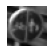

Forma:(30, 30), min:0.17773892810457495, max:0.9860786274509775


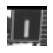

Forma:(30, 30), min:0.0, max:0.996078431372549


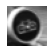

Forma:(30, 30), min:0.12769815816993463, max:0.9907546514161221


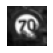

Forma:(30, 30), min:0.1152300653594773, max:0.7989047947712418


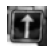

Forma:(30, 30), min:0.15438497058823533, max:0.8649612745098039


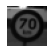

Forma:(30, 30), min:0.17785785947712418, max:0.9386777156862746


In [102]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im, cmap="gray")# si quitamos (, cmap="gray") nod daria como imagen de calor
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

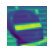

Forma:(30, 30), min:0.10256505228758168, max:0.9518748875816996


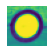

Forma:(30, 30), min:0.36495268627450916, max:0.9997172549019608


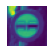

Forma:(30, 30), min:0.07270164215686276, max:0.577365495098039


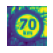

Forma:(30, 30), min:0.12420370915032707, max:0.9938751156862744


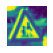

Forma:(30, 30), min:0.08688384139433551, max:0.9976682091503268


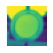

Forma:(30, 30), min:0.10939419749455336, max:0.9997172549019608


In [103]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)# si quitamos (, cmap="gray") nos daria como imagen de calor
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

### **Creamos el modelo**
solo funcion si primero instalamos la Version 1 de Tensorflow

In [0]:
!pip install tensorflow-gpu==1.14

In [0]:

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [0]:
# dimencionamos los objetos
x = tf.placeholder(dtype = tf.float32, shape = [None, 30,30])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# creamos la red neuronal
images_flat = tf.contrib.layers.flatten(x)# crea listas planas
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)# capa de coneccion

# funcion de clasificaion de atraves de regreciones logisticas
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits=logits))

# creamos funcion para Optimizar 
train_opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

final_pred = tf.argmax(logits,1)

accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))

In [0]:
images_flat

In [0]:
logits

<tf.Tensor 'fully_connected/Relu:0' shape=(?, 62) dtype=float32>

In [0]:
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [0]:
final_pred

<tf.Tensor 'ArgMax:0' shape=(?,) dtype=int64>

In [0]:
tf.set_random_seed(1234)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(601):
    
    _, accuracy_val = sess.run([train_opt, accuracy],
                              feed_dict= {
                                  x: images30,
                                  y: list(labels)
                              })
    #_, loss_val = sess.run([train_opt, loss],
    #                          feed_dict= {
    #                              x: images30,
    #                              y: list(labels)
    #                          })
    if i%50 == 0:
        print("EPOCH", i)
        print("Eficacia: ", accuracy_val)
        #print("Pérdidas:", loss_val)
    #print("Fin del Ecpoh ", i)

# Evaluación de la red neuronal

In [0]:
sample_idx = random.sample(range(len(images30)), 40)
sample_images = [images30[i] for i in sample_idx]
sample_labels = [labels[i] for i in sample_idx]

In [0]:
prediction = sess.run([final_pred], feed_dict={x:sample_images})[0]

In [0]:
prediction

array([37, 22, 22,  0, 32, 56, 47, 35, 40, 22, 38, 38,  1, 34, 56, 32, 32,
        7, 28, 61, 38, 39, 61, 37, 47, 61, 32, 38, 32, 41, 32, 39, 32, 31,
       47, 28, 40, 47, 57, 54])

In [0]:
sample_labels

[37,
 22,
 22,
 19,
 32,
 56,
 47,
 35,
 40,
 22,
 38,
 38,
 4,
 34,
 56,
 9,
 32,
 7,
 28,
 61,
 38,
 44,
 61,
 37,
 47,
 61,
 32,
 38,
 45,
 41,
 32,
 39,
 32,
 31,
 47,
 19,
 40,
 47,
 57,
 53]

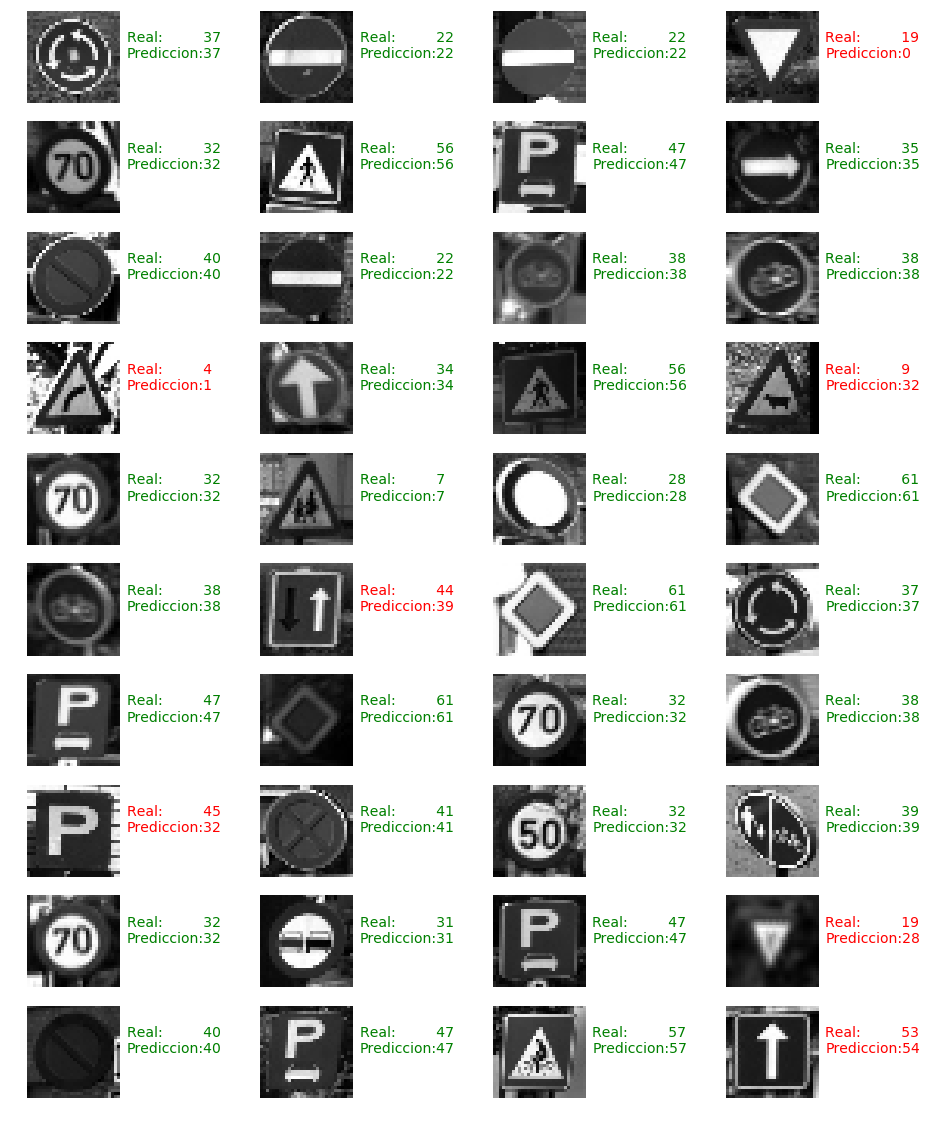

In [0]:
plt.figure(figsize=(16,20))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    predi = prediction[i]
    plt.subplot(10,4,i+1)
    plt.axis("off")
    color = "green" if truth==predi else "red"
    plt.text(32,15, "Real:         {0}\nPrediccion:{1}".format(truth, predi),
            fontsize = 14, color = color)
    plt.imshow(sample_images[i], cmap="gray")
plt.show()

In [0]:
test_images, test_labels = load_ml_data(test_data_dir)

In [0]:
test_images30 = [transform.resize(im,(30,30)) for im in test_images]

/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [0]:
test_images30 = rgb2gray(np.array(test_images30))

In [0]:
prediction = sess.run([final_pred], feed_dict={x:test_images30})[0]

In [0]:
match_count = sum([int(l0 == lp) for l0, lp in zip(test_labels, prediction)])
match_count

1603

In [0]:
acc = match_count/len(test_labels)*100
print("Eficacia de la red neuronal: {:.2f}".format(acc))

Eficacia de la red neuronal: 63.61


### Creacion de mi propia red neuronal

Voy a crear una red neuronal usando tensorflow

### Construccion de la RNA
Modelo basado en Sequential() indica una capa detras de la otra que van a ser rellenadas con capas totalemnte conectadas

* Se van a calcular una detras de la otra en secuencia

Hyper-parametros de la capa:

* número de unidades/neuronas: 130
* función de activación: ReLU 0 si el valor el negativo, de lo contrario se queda con el valor actual
* input_shape: (30,30) esto tiene correspondencia directa con el tamaño de imagen 30*30

**Capa DropOut**

Dropout es una técnica de Regularization donde aleatoriamente se asignan a ciertas neuronas de la red el valor cero. De este modo, mientras se entrena, estas neuronas no actualizarán sus valores. Al tener cierto porcentaje de neuronas sin actualizar, el proceso de entrenamiento toma más tiempo pero por contra tenemos menos posibilidades de sufrir overfitting.

* Significa que en el fase de entrenamiento (propagacion hacia atras) los valores no se van a actualizar

* Estaran dormidas, como no se actualizan cierto porcentaje de ellas conservan sus valores iniciales sin retroalimentarse

* Los valores de DropOut tipicamente estan entre 20% y 50%

**Añadir la segunda capa (capa de salida)**

* Unidades: número de clases (62 tipos de señal)
* función de activación: 'softmax' (probabilidades de cada clase) devuelve probabilidad de cual (cuan % esta seguro)

In [0]:

import tensorflow as tf
import os #para manejo de archivos
import skimage.data as imd #un sklearn para imagenes
import numpy as np
import datetime #informacion con el tiempo de TF
import matplotlib.pyplot as plt #para graficar
### ===== para tratar las imagenes
from skimage import transform #para redimensionar las imagenes
from skimage.color import rgb2gray#convertir a espacio de color gris. (hay muchos mas como rojo, verde, azul)

import random #aleatory num

In [0]:
# ejemplos de installacion : https://colab.research.google.com/notebooks/snippets/importing_libraries.ipynb#scrollTo=6km1lWMF2kAm
# To determine which version you're using:

!pip show tensorflow

# For the current version: 
!pip install --upgrade tensorflow

# For a specific version:
!pip install tensorflow==1.2

# For the latest nightly build:
!pip install tf-nightly

In [106]:
tf.__version__

'2.2.0'

In [0]:

#Funcion para importar los datos ==============================
def load_ml_data(data_directory):#recibo la ruta de los datos
    dirs = [d for d in os.listdir(data_directory)
           if os.path.isdir(os.path.join(data_directory,d))]#voy pasando item por item de cada directoriolisto todos los directorios que se pueden obtener a partir de data_directory
    
    #print(dirs)#muestro directorios DEBUG
    
    labels = [] #array de etiquetas para las fotos
    images = [] #el archivo de imagen en si
    for d in dirs:
        label_dir = os.path.join(data_directory, d)#entro a cada carpetica en la lista dirs
        file_names = [os.path.join(label_dir,f) #reviso cada item del directorio SI es un archivo de imagen lo guardo 
                     for f in os.listdir(label_dir)   
                     if f.endswith(".ppm")]
        #----------DEBUG
        #print(label_dir)#directorios
        #print("\n")
        #print(file_names)#nombres de archivo dentro de ese directorio (cada una de las fotos)
        
        #--- Vamos a recorrer las imagenes
        for f in file_names:
            images.append(imd.load(f))#leo imagen y la agrego a images conm el formato de datos para skimage
            labels.append(int(d))#numeros enteros para los labels
            
    return images, labels

In [0]:
main_dir = "/content/Curso_Machine_Learning_Data_Science_Python/datasets/belgian/" #directorio principipal
train_dir = os.path.join(main_dir, "Training") #Directorio de entrenamiento
test_dir = os.path.join(main_dir, "Testing") #directorio de test

In [116]:
X_train, Y_train = load_ml_data(train_dir)#X_train = imagenes Y_train =labels
X_test, Y_test = load_ml_data(test_dir)#X_train = imagenes Y_train =labels

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: This function is deprecated and will be removed in 0.18. Use `skimage.io.load` or `imageio.imread` directly.


In [0]:
def info_dataset(dataxy):
    print("longitud: ", len(dataxy))
    print("Tipo: ", type(dataxy))
    print("-----")

In [119]:

info_dataset(X_train)#informacion de imagenes train
info_dataset(Y_train)#labels train
info_dataset(X_test)#informacion de imagenes test
info_dataset(Y_test)#labels test

longitud:  4575
Tipo:  <class 'list'>
-----
longitud:  4575
Tipo:  <class 'list'>
-----
longitud:  2520
Tipo:  <class 'list'>
-----
longitud:  2520
Tipo:  <class 'list'>
-----


In [0]:
def info_imagen(imgs):
    print("Datos iniciales de imagen: ", imgs.flags)
    print("Itemsize:", imgs.itemsize)#elementos en cuantos bits?
    print("# de bytes: ", imgs.nbytes)
    print("Bytes que uso:", imgs.nbytes/imgs.itemsize) #las bytes que estoy utilizando

In [0]:
X_img_train = np.array(X_train)
Y_lbl_train = np.array(Y_train)
X_img_test = np.array(X_test)
Y_lbl_test = np.array(Y_test)

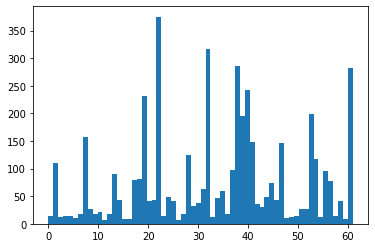

In [124]:
plt.hist(Y_lbl_train, len(set(Y_lbl_train)))
plt.show()

In [125]:
rand_signs = random.sample(range(0,len(Y_lbl_train)),6)#quiero una muestra aleatoria simple
rand_signs

[552, 221, 1837, 2790, 2109, 500]

In [0]:
def data_random(random_img,dtset_evaluado):#dataset evaluado recibe el conjunto de imagenes (el completo) sobre el cual vamos a iterar
    for i in range(len(rand_signs)):
        temp_img = dtset_evaluado[rand_signs[i]]#imagen actual 
        plt.subplot(1,6,i+1)#dibujo 6 columnas (6 fotitos)
        plt.axis("off")
        plt.imshow(temp_img)#muestro las imagenes 
        plt.subplots_adjust(wspace=0.5)#espacio para que las imagenes no salgan muy pegadas

        plt.show()#muestro

        #la sigueinte notacion viene de Django, me permite poner parametros al texto que se encuentra numerado entre las llaves
        print("Forma: {0}, Min: {1}, Max:{2}".format(temp_img.shape,#altura y ancho
                                                     temp_img.min(),#pixel con menor color
                                                     temp_img.max()))#pixel con mas color

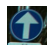

Forma: (94, 96, 3), Min: 0, Max:255


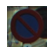

Forma: (76, 74, 3), Min: 4, Max:202


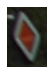

Forma: (61, 40, 3), Min: 8, Max:136


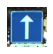

Forma: (142, 140, 3), Min: 0, Max:255


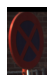

Forma: (392, 227, 3), Min: 0, Max:255


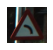

Forma: (109, 119, 3), Min: 0, Max:255


In [127]:
data_random(rand_signs, X_img_train)

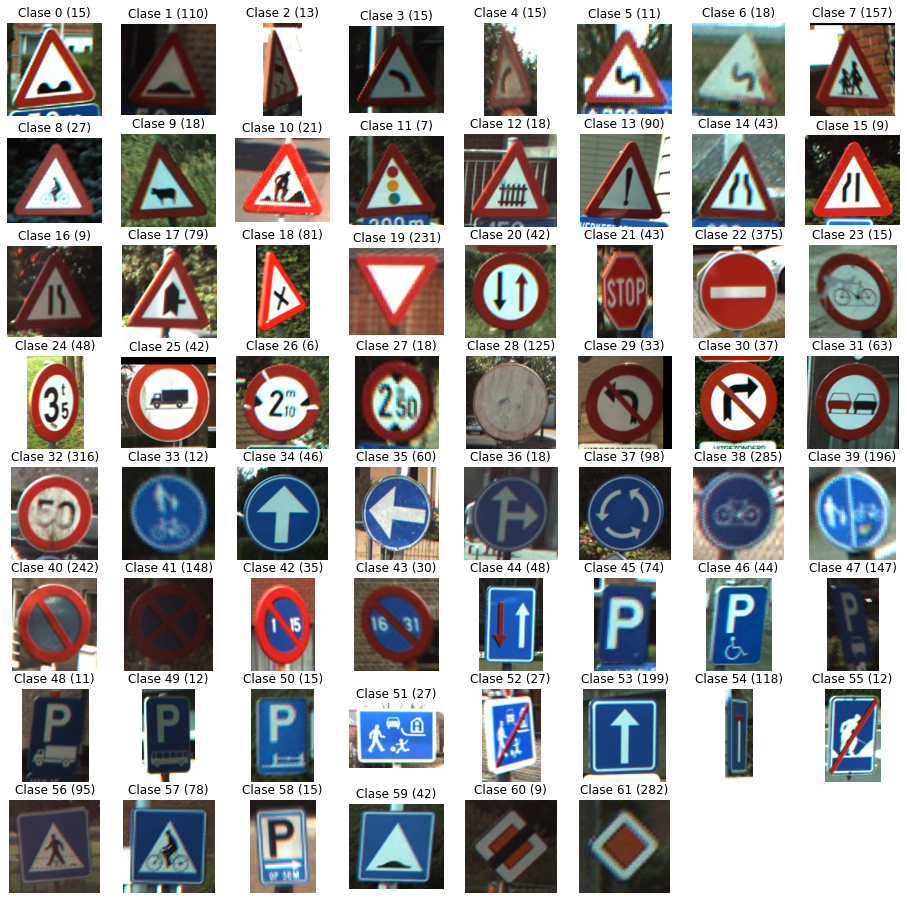

In [128]:
unique_labels = set(Y_lbl_train)#etiquetas unicas
plt.figure(figsize=(16,16))#tamaño de la figura aqui
i=1
for label in unique_labels:
    temp_img = X_img_train[list(Y_lbl_train).index(label)]#me quedo con la imagen en la posicion del indice NO en el indice
    #se convierte en lista para poder usar la propiedad index
    #con esa posicion busco la imagen de la cual procede
    plt.subplot(8,8,i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label,list(Y_lbl_train).count(label)))
    i+=1 #manejo contador
    plt.imshow(temp_img)#muestro imagen en bucle
    
plt.show()

In [129]:
#deseo conocer el tamaño de imagen mas pequeño que me puedo encontrar
w = 9999
h = 9999
for image in X_img_train:#paso por todas las imagenes. El tamaño minimo puede ser combinacion de dos fotos diferentes
    if image.shape[0] < h:
        h = image.shape[0]
    if image.shape[1] < w:
        w = image.shape[1]
print ("tamaño minimo: {0},{1}".format(h,w))

tamaño minimo: 22,20


In [130]:
#doy tamaño 30x30 a todas las imagenes de la carpeta de entrenamiento. las mas pequeñas las hara mas grandes
X_img_train30 = [transform.resize(image,(30,30)) for image in X_img_train]
X_img_train30[0]#los valores cambiaron --> ahora tiene 900 pixeles

array([[[0.45945969, 0.40627451, 0.34926362],
        [0.504     , 0.41581699, 0.3469281 ],
        [0.49041394, 0.41346405, 0.34496732],
        ...,
        [0.3848366 , 0.34801743, 0.30697168],
        [0.37437908, 0.33704575, 0.29594771],
        [0.39856209, 0.35542484, 0.31228758]],

       [[0.49848366, 0.45952941, 0.39877124],
        [0.57003922, 0.49058824, 0.42117647],
        [0.54614379, 0.46091503, 0.39555556],
        ...,
        [0.38039216, 0.34143791, 0.29960784],
        [0.3825098 , 0.34117647, 0.29945098],
        [0.38980392, 0.33498039, 0.29960784]],

       [[0.44627451, 0.41084967, 0.34679739],
        [0.48405229, 0.43908497, 0.37267974],
        [0.48409586, 0.43071895, 0.37145969],
        ...,
        [0.39477124, 0.35119826, 0.3       ],
        [0.39699346, 0.34026144, 0.29647059],
        [0.38671024, 0.3179085 , 0.28605664]],

       ...,

       [[0.98074074, 0.98466231, 0.96788671],
        [0.96431373, 0.9475817 , 0.87712418],
        [0.71220044, 0

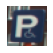

Forma: (30, 30, 3), Min: 0.10078431372549015, Max:0.9180980392156866


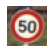

Forma: (30, 30, 3), Min: 0.10745098039215699, Max:0.9885620915032679


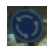

Forma: (30, 30, 3), Min: 0.06666666666666667, Max:0.8022549019607844


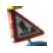

Forma: (30, 30, 3), Min: 0.08245098039215686, Max:0.996078431372549


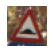

Forma: (30, 30, 3), Min: 0.08568627450980412, Max:0.9683333333333338


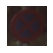

Forma: (30, 30, 3), Min: 0.09362745098039217, Max:0.3553921568627454


In [131]:
#revisamos nuevamente el tamaño, ahora con el cambio aplicado
rand_signs = random.sample(range(0, len(Y_lbl_train)), 6)#genero aleatorio
data_random(rand_signs,X_img_train30)

In [0]:
X_img_train30 = np.array(X_img_train30) #tamaño y tipo de dato correcto para skimage

X_img_train30 = rgb2gray(X_img_train30)

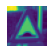

Forma: (30, 30), Min: 0.02578096470588247, Max:0.9741515163398693


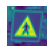

Forma: (30, 30), Min: 0.05823529411764706, Max:0.7595086588235294


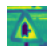

Forma: (30, 30), Min: 0.06090574291938996, Max:0.972997359477124


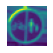

Forma: (30, 30), Min: 0.1626646954248364, Max:0.9698100130718954


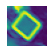

Forma: (30, 30), Min: 0.10968763921568861, Max:0.9794261176470587


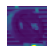

Forma: (30, 30), Min: 0.09309531111111109, Max:0.9588773551198252


In [134]:
rand_signs = random.sample(range(0, len(Y_lbl_train)), 6)
data_random(rand_signs,X_img_train30)
#para que se vea gris agrega esta linea a la funcion inicialmente definida:
#plt.imshow(temp_im, cmap="gray")#especifico la temperatura de color igualmente (SI NO se ve como azul con amarillo)

In [138]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(30,30))) #capa de aplanado que recibe 900 pixeles 30*30 c/u de las imagenes
model.add(tf.keras.layers.Dense(units=130, activation="relu")) #activador relu, 130 neuronas
model.add(tf.keras.layers.Dense(units=256, activation="sigmoid"))#nueva capa para mejorar efectividad
model.add(tf.keras.layers.Dropout(0.2)) #capa DropOut, 20% NO aprende. Esto para mejorar su eficacia con datos diferentes a los de test
model.add(tf.keras.layers.Dense(units=62, activation='softmax'))
#capa de salida, 62 diferentes categorias

AttributeError: ignored

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [137]:
model.summary() #resumen de los datos de mi modelo

In [140]:
model.fit(X_img_train30, Y_lbl_train, epochs=10)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 4575 samples
Epoch 1/10


InvalidArgumentError: ignored

In [0]:
https://github.com/luisbenitez02/python-ml-curso/blob/master/notebooks/T11-2-Ejercicio-DeepLearningSenialesTrafico.ipynb